In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

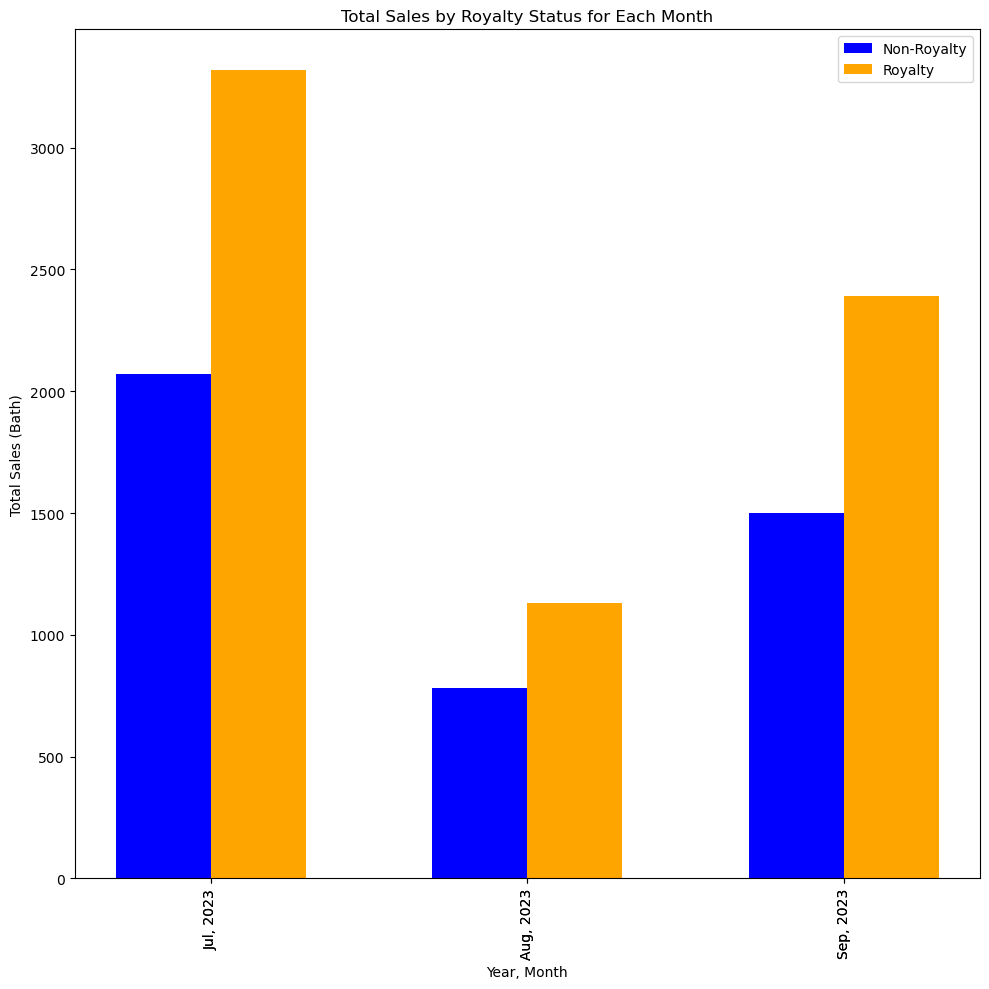

In [6]:
# ---
# Group No. 3
# 1. สุภัคนภา ,ใจเย็น  6410450061
# 2.,สโรชา,อัศวพิชญโชติ 6410451881
# 3. มงคล,คงเสมา 6410450567
# ---
group = 3
problem = 6 # ปัญหาที่
data_num = 1 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)
data.head()
df = pd.DataFrame(data)


# --- เริ่มเขียนโค้ดตรงนี้ ---
#แปลงคอลัมน์ 'royalty_number' ให้เป็น NaN เมื่อค่าว่าง
df['royalty_number'] = df['royalty_number'].replace(' ', np.nan)

#แปลงคอลัมน์ 'date' เป็นประเภท datetime
df['date'] = pd.to_datetime(df['date'])

#คัดกรองข้อมูลเฉพาะรายการที่มี 'royalty_number' และคำนวณยอดขายรายเดือน
monthly_sales_with_royalty = df.dropna(subset=['royalty_number']).groupby(df['date'].dt.to_period('M'))['total_sale'].sum().reset_index()

#คำนวณยอดขายรายเดือนสำหรับรายการที่ไม่มี 'royalty_number'
monthly_sales_without_royalty = df[df['royalty_number'].isna()].groupby(df['date'].dt.to_period('M'))['total_sale'].sum().reset_index()

#สร้าง DataFrame สำหรับผลลัพธ์
result_with_royalty = monthly_sales_with_royalty.rename(columns={'date': 'year_month'})
result_with_royalty['royalty_number'] = True

result_without_royalty = monthly_sales_without_royalty.rename(columns={'date': 'year_month'})
result_without_royalty['royalty_number'] = False

#รวมผลลัพธ์สองกลุ่มเข้าด้วยกัน
result = pd.concat([result_with_royalty, result_without_royalty], ignore_index=True)

#แยก 'year' และ 'month' เป็นคอลัมน์แยกกัน
result['year'] = result['year_month'].dt.year
result['month'] = result['year_month'].dt.month
result = result[['year', 'month', 'royalty_number', 'total_sale']]
#result = result.sort_values(by='month', ascending=True)
result = result.sort_values(by=['month', 'royalty_number'], ascending=[True, True])


import matplotlib.pyplot as plt
import calendar

# สร้างแผนภูมิแท่งเปรียบเทียบ
plt.figure(figsize=(10, 10))  # ขนาดของแผนภูมิ 1000x1000 พิกเซล

# คำนวณตำแหน่งแท่งสำหรับสมาชิก (Royalty) และไม่ได้เป็นสมาชิก (Non-Royalty)
royalty_x = result[result['royalty_number'] == True]['month']
non_royalty_x = result[result['royalty_number'] == False]['month']

# แท่งเปรียบเทียบสำหรับ Non-Royalty
plt.bar(non_royalty_x - 0.15, result[result['royalty_number'] == False]['total_sale'], width=0.3, label='Non-Royalty', align='center', color='blue')

# แท่งเปรียบเทียบสำหรับ Royalty
plt.bar(royalty_x + 0.15, result[result['royalty_number'] == True]['total_sale'], width=0.3, label='Royalty', align='center', color='orange')

# แปลงเลขเดือนเป็นตัวย่อของเดือน
month_abbr = [calendar.month_abbr[month] for month in result['month']]

# เพิ่มปีไปยังตัวย่อของเดือน
month_year_labels = [f"{abbr}, {year}" for abbr, year in zip(month_abbr, result['year'])]

plt.xticks(result['month'], month_year_labels, rotation=90)  # ใช้ตัวย่อของเดือนและปี
plt.xlabel('Year, Month')
plt.ylabel('Total Sales (Bath)')
plt.title('Total Sales by Royalty Status for Each Month')
plt.legend()
plt.tight_layout()  # ใช้เพื่อปรับระยะห่างและหลีกเลี่ยงการทับกันของข้อมูล


# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
result.to_csv(result_path, index=False)

#แสดงผลลัพธ์
result.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()

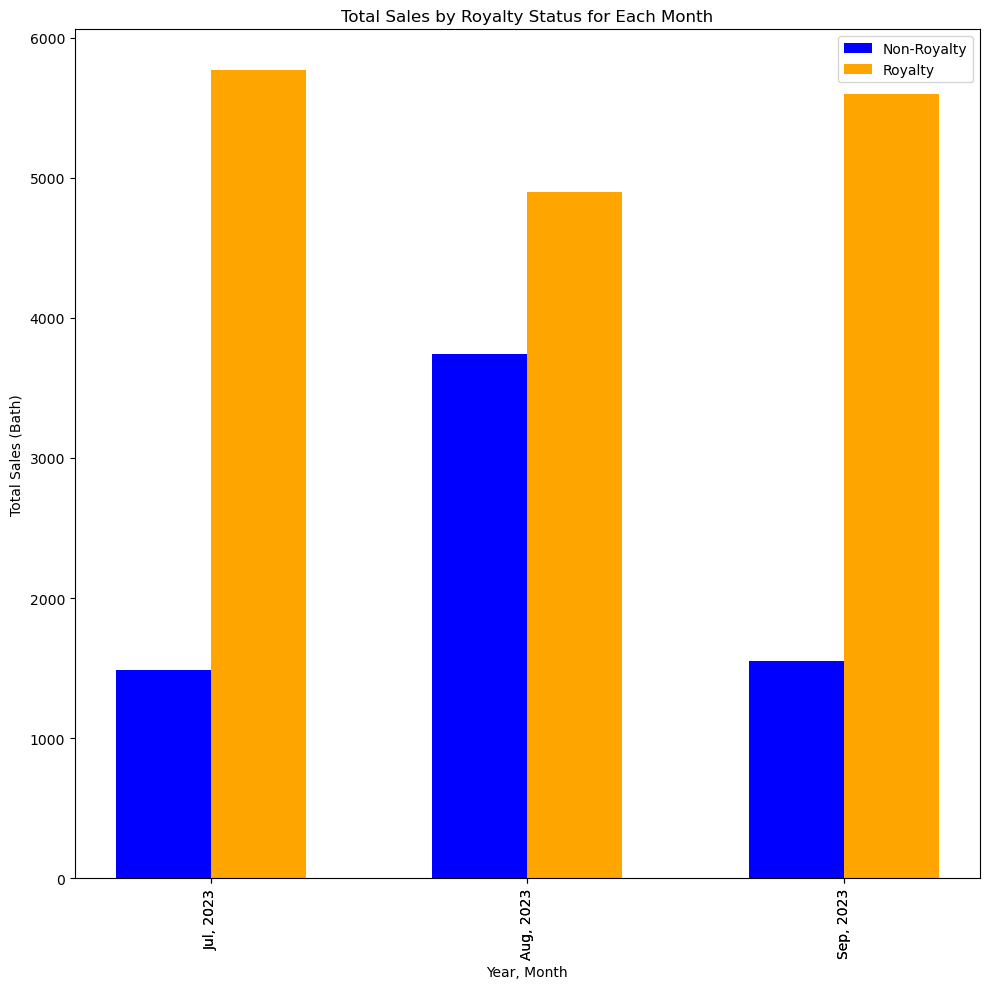

In [7]:
# ---
# Group No. 3
# 1. สุภัคนภา ,ใจเย็น  6410450061
# 2.,สโรชา,อัศวพิชญโชติ 6410451881
# 3. มงคล,คงเสมา 6410450567
# ---
group = 3
problem = 6 # ปัญหาที่
data_num = 2 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)
data.head()
df = pd.DataFrame(data)


# --- เริ่มเขียนโค้ดตรงนี้ ---
#แปลงคอลัมน์ 'royalty_number' ให้เป็น NaN เมื่อค่าว่าง
df['royalty_number'] = df['royalty_number'].replace(' ', np.nan)

#แปลงคอลัมน์ 'date' เป็นประเภท datetime
df['date'] = pd.to_datetime(df['date'])

#คัดกรองข้อมูลเฉพาะรายการที่มี 'royalty_number' และคำนวณยอดขายรายเดือน
monthly_sales_with_royalty = df.dropna(subset=['royalty_number']).groupby(df['date'].dt.to_period('M'))['total_sale'].sum().reset_index()

#คำนวณยอดขายรายเดือนสำหรับรายการที่ไม่มี 'royalty_number'
monthly_sales_without_royalty = df[df['royalty_number'].isna()].groupby(df['date'].dt.to_period('M'))['total_sale'].sum().reset_index()

#สร้าง DataFrame สำหรับผลลัพธ์
result_with_royalty = monthly_sales_with_royalty.rename(columns={'date': 'year_month'})
result_with_royalty['royalty_number'] = True

result_without_royalty = monthly_sales_without_royalty.rename(columns={'date': 'year_month'})
result_without_royalty['royalty_number'] = False

#รวมผลลัพธ์สองกลุ่มเข้าด้วยกัน
result = pd.concat([result_with_royalty, result_without_royalty], ignore_index=True)

#แยก 'year' และ 'month' เป็นคอลัมน์แยกกัน
result['year'] = result['year_month'].dt.year
result['month'] = result['year_month'].dt.month
result = result[['year', 'month', 'royalty_number', 'total_sale']]
#result = result.sort_values(by='month', ascending=True)
result = result.sort_values(by=['month', 'royalty_number'], ascending=[True, True])


import matplotlib.pyplot as plt
import calendar

# สร้างแผนภูมิแท่งเปรียบเทียบ
plt.figure(figsize=(10, 10))  # ขนาดของแผนภูมิ 1000x1000 พิกเซล

# คำนวณตำแหน่งแท่งสำหรับสมาชิก (Royalty) และไม่ได้เป็นสมาชิก (Non-Royalty)
royalty_x = result[result['royalty_number'] == True]['month']
non_royalty_x = result[result['royalty_number'] == False]['month']

# แท่งเปรียบเทียบสำหรับ Non-Royalty
plt.bar(non_royalty_x - 0.15, result[result['royalty_number'] == False]['total_sale'], width=0.3, label='Non-Royalty', align='center', color='blue')

# แท่งเปรียบเทียบสำหรับ Royalty
plt.bar(royalty_x + 0.15, result[result['royalty_number'] == True]['total_sale'], width=0.3, label='Royalty', align='center', color='orange')

# แปลงเลขเดือนเป็นตัวย่อของเดือน
month_abbr = [calendar.month_abbr[month] for month in result['month']]

# เพิ่มปีไปยังตัวย่อของเดือน
month_year_labels = [f"{abbr}, {year}" for abbr, year in zip(month_abbr, result['year'])]

plt.xticks(result['month'], month_year_labels, rotation=90)  # ใช้ตัวย่อของเดือนและปี
plt.xlabel('Year, Month')
plt.ylabel('Total Sales (Bath)')
plt.title('Total Sales by Royalty Status for Each Month')
plt.legend()
plt.tight_layout()  # ใช้เพื่อปรับระยะห่างและหลีกเลี่ยงการทับกันของข้อมูล


# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
result.to_csv(result_path, index=False)

#แสดงผลลัพธ์
result.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()

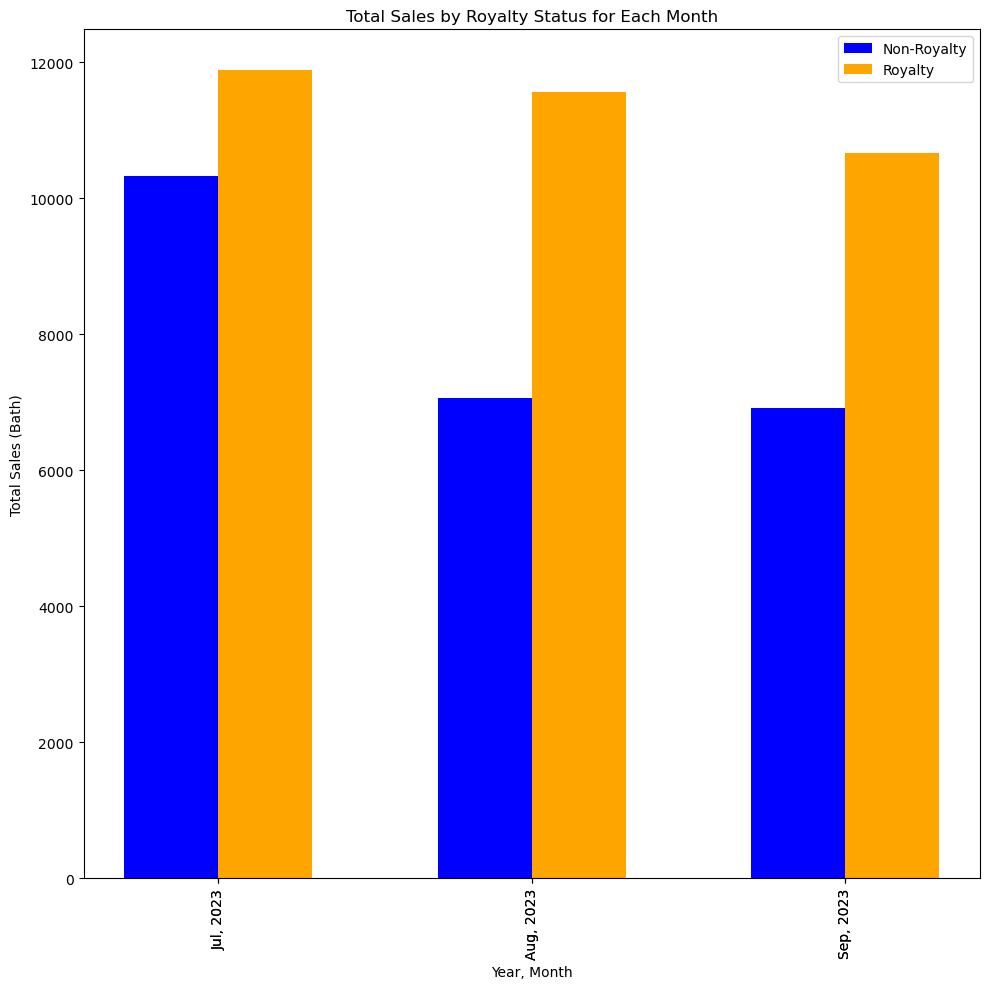

In [8]:
# ---
# Group No. 3
# 1. สุภัคนภา ,ใจเย็น  6410450061
# 2.,สโรชา,อัศวพิชญโชติ 6410451881
# 3. มงคล,คงเสมา 6410450567
# ---
group = 3
problem = 6 # ปัญหาที่
data_num = 3 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)
data.head()
df = pd.DataFrame(data)


# --- เริ่มเขียนโค้ดตรงนี้ ---
#แปลงคอลัมน์ 'royalty_number' ให้เป็น NaN เมื่อค่าว่าง
df['royalty_number'] = df['royalty_number'].replace(' ', np.nan)

#แปลงคอลัมน์ 'date' เป็นประเภท datetime
df['date'] = pd.to_datetime(df['date'])

#คัดกรองข้อมูลเฉพาะรายการที่มี 'royalty_number' และคำนวณยอดขายรายเดือน
monthly_sales_with_royalty = df.dropna(subset=['royalty_number']).groupby(df['date'].dt.to_period('M'))['total_sale'].sum().reset_index()

#คำนวณยอดขายรายเดือนสำหรับรายการที่ไม่มี 'royalty_number'
monthly_sales_without_royalty = df[df['royalty_number'].isna()].groupby(df['date'].dt.to_period('M'))['total_sale'].sum().reset_index()

#สร้าง DataFrame สำหรับผลลัพธ์
result_with_royalty = monthly_sales_with_royalty.rename(columns={'date': 'year_month'})
result_with_royalty['royalty_number'] = True

result_without_royalty = monthly_sales_without_royalty.rename(columns={'date': 'year_month'})
result_without_royalty['royalty_number'] = False

#รวมผลลัพธ์สองกลุ่มเข้าด้วยกัน
result = pd.concat([result_with_royalty, result_without_royalty], ignore_index=True)

#แยก 'year' และ 'month' เป็นคอลัมน์แยกกัน
result['year'] = result['year_month'].dt.year
result['month'] = result['year_month'].dt.month
result = result[['year', 'month', 'royalty_number', 'total_sale']]
#result = result.sort_values(by='month', ascending=True)
result = result.sort_values(by=['month', 'royalty_number'], ascending=[True, True])


import matplotlib.pyplot as plt
import calendar

# สร้างแผนภูมิแท่งเปรียบเทียบ
plt.figure(figsize=(10, 10))  # ขนาดของแผนภูมิ 1000x1000 พิกเซล

# คำนวณตำแหน่งแท่งสำหรับสมาชิก (Royalty) และไม่ได้เป็นสมาชิก (Non-Royalty)
royalty_x = result[result['royalty_number'] == True]['month']
non_royalty_x = result[result['royalty_number'] == False]['month']

# แท่งเปรียบเทียบสำหรับ Non-Royalty
plt.bar(non_royalty_x - 0.15, result[result['royalty_number'] == False]['total_sale'], width=0.3, label='Non-Royalty', align='center', color='blue')

# แท่งเปรียบเทียบสำหรับ Royalty
plt.bar(royalty_x + 0.15, result[result['royalty_number'] == True]['total_sale'], width=0.3, label='Royalty', align='center', color='orange')

# แปลงเลขเดือนเป็นตัวย่อของเดือน
month_abbr = [calendar.month_abbr[month] for month in result['month']]

# เพิ่มปีไปยังตัวย่อของเดือน
month_year_labels = [f"{abbr}, {year}" for abbr, year in zip(month_abbr, result['year'])]

plt.xticks(result['month'], month_year_labels, rotation=90)  # ใช้ตัวย่อของเดือนและปี
plt.xlabel('Year, Month')
plt.ylabel('Total Sales (Bath)')
plt.title('Total Sales by Royalty Status for Each Month')
plt.legend()
plt.tight_layout()  # ใช้เพื่อปรับระยะห่างและหลีกเลี่ยงการทับกันของข้อมูล


# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
result.to_csv(result_path, index=False)

#แสดงผลลัพธ์
result.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()

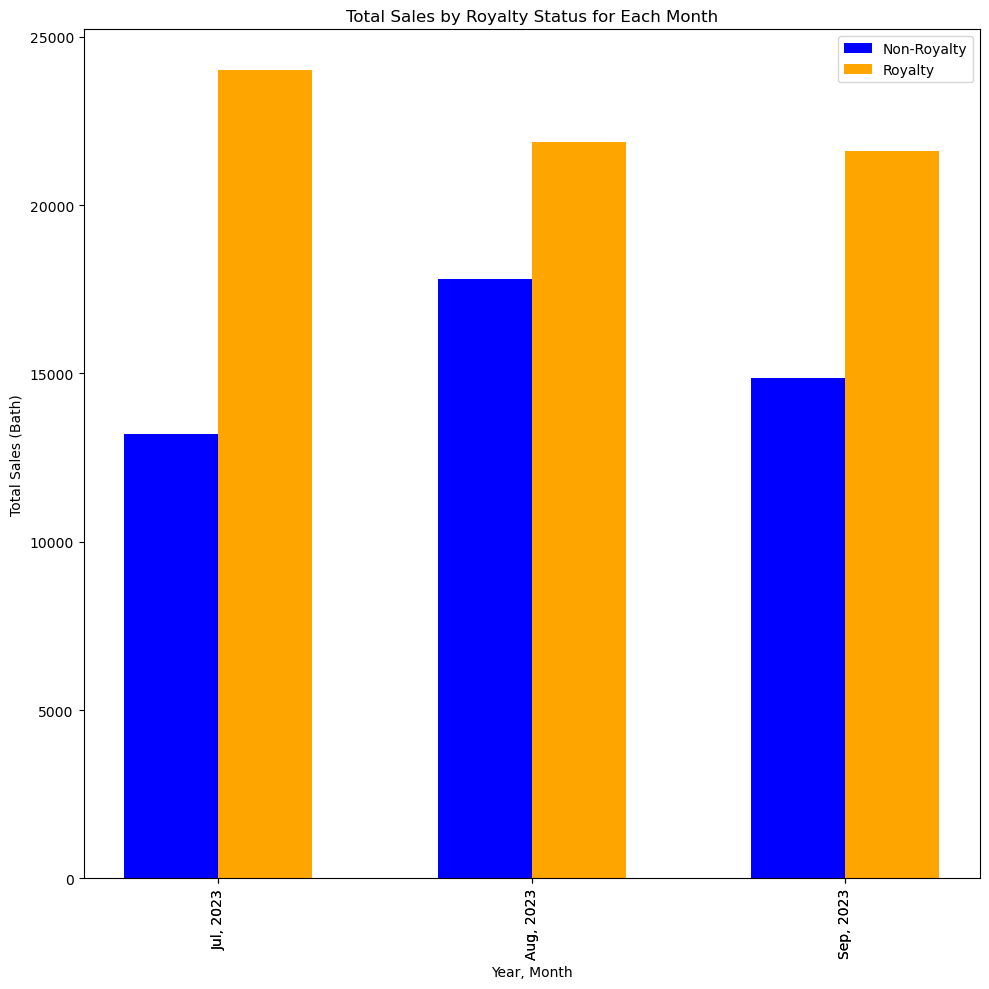

In [9]:
# ---
# Group No. 3
# 1. สุภัคนภา ,ใจเย็น  6410450061
# 2.,สโรชา,อัศวพิชญโชติ 6410451881
# 3. มงคล,คงเสมา 6410450567
# ---
group = 3
problem = 6 # ปัญหาที่
data_num = 4 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)
data.head()
df = pd.DataFrame(data)


# --- เริ่มเขียนโค้ดตรงนี้ ---
#แปลงคอลัมน์ 'royalty_number' ให้เป็น NaN เมื่อค่าว่าง
df['royalty_number'] = df['royalty_number'].replace(' ', np.nan)

#แปลงคอลัมน์ 'date' เป็นประเภท datetime
df['date'] = pd.to_datetime(df['date'])

#คัดกรองข้อมูลเฉพาะรายการที่มี 'royalty_number' และคำนวณยอดขายรายเดือน
monthly_sales_with_royalty = df.dropna(subset=['royalty_number']).groupby(df['date'].dt.to_period('M'))['total_sale'].sum().reset_index()

#คำนวณยอดขายรายเดือนสำหรับรายการที่ไม่มี 'royalty_number'
monthly_sales_without_royalty = df[df['royalty_number'].isna()].groupby(df['date'].dt.to_period('M'))['total_sale'].sum().reset_index()

#สร้าง DataFrame สำหรับผลลัพธ์
result_with_royalty = monthly_sales_with_royalty.rename(columns={'date': 'year_month'})
result_with_royalty['royalty_number'] = True

result_without_royalty = monthly_sales_without_royalty.rename(columns={'date': 'year_month'})
result_without_royalty['royalty_number'] = False

#รวมผลลัพธ์สองกลุ่มเข้าด้วยกัน
result = pd.concat([result_with_royalty, result_without_royalty], ignore_index=True)

#แยก 'year' และ 'month' เป็นคอลัมน์แยกกัน
result['year'] = result['year_month'].dt.year
result['month'] = result['year_month'].dt.month
result = result[['year', 'month', 'royalty_number', 'total_sale']]
#result = result.sort_values(by='month', ascending=True)
result = result.sort_values(by=['month', 'royalty_number'], ascending=[True, True])


import matplotlib.pyplot as plt
import calendar

# สร้างแผนภูมิแท่งเปรียบเทียบ
plt.figure(figsize=(10, 10))  # ขนาดของแผนภูมิ 1000x1000 พิกเซล

# คำนวณตำแหน่งแท่งสำหรับสมาชิก (Royalty) และไม่ได้เป็นสมาชิก (Non-Royalty)
royalty_x = result[result['royalty_number'] == True]['month']
non_royalty_x = result[result['royalty_number'] == False]['month']

# แท่งเปรียบเทียบสำหรับ Non-Royalty
plt.bar(non_royalty_x - 0.15, result[result['royalty_number'] == False]['total_sale'], width=0.3, label='Non-Royalty', align='center', color='blue')

# แท่งเปรียบเทียบสำหรับ Royalty
plt.bar(royalty_x + 0.15, result[result['royalty_number'] == True]['total_sale'], width=0.3, label='Royalty', align='center', color='orange')

# แปลงเลขเดือนเป็นตัวย่อของเดือน
month_abbr = [calendar.month_abbr[month] for month in result['month']]

# เพิ่มปีไปยังตัวย่อของเดือน
month_year_labels = [f"{abbr}, {year}" for abbr, year in zip(month_abbr, result['year'])]

plt.xticks(result['month'], month_year_labels, rotation=90)  # ใช้ตัวย่อของเดือนและปี
plt.xlabel('Year, Month')
plt.ylabel('Total Sales (Bath)')
plt.title('Total Sales by Royalty Status for Each Month')
plt.legend()
plt.tight_layout()  # ใช้เพื่อปรับระยะห่างและหลีกเลี่ยงการทับกันของข้อมูล


# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
result.to_csv(result_path, index=False)

#แสดงผลลัพธ์
result.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()

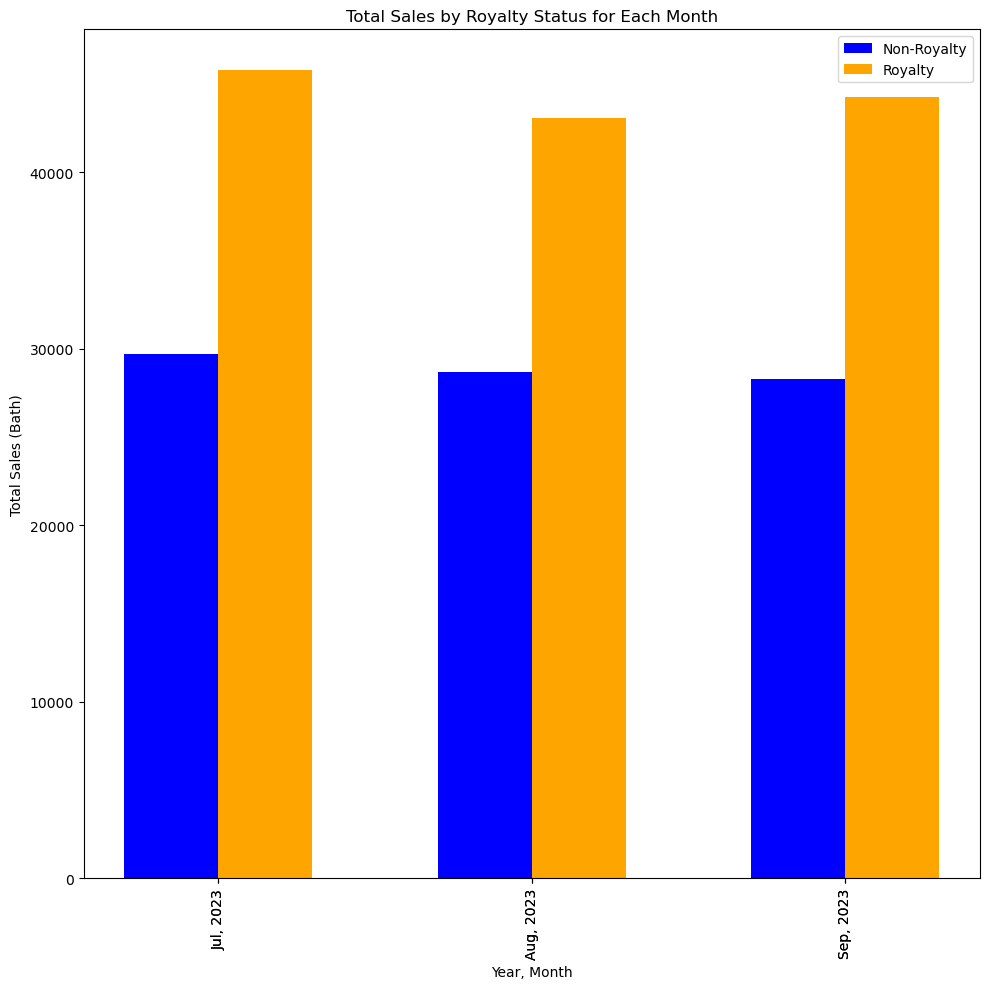

In [10]:
# ---
# Group No. 3
# 1. สุภัคนภา ,ใจเย็น  6410450061
# 2.,สโรชา,อัศวพิชญโชติ 6410451881
# 3. มงคล,คงเสมา 6410450567
# ---
group = 3
problem = 6 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)
data.head()
df = pd.DataFrame(data)


# --- เริ่มเขียนโค้ดตรงนี้ ---
#แปลงคอลัมน์ 'royalty_number' ให้เป็น NaN เมื่อค่าว่าง
df['royalty_number'] = df['royalty_number'].replace(' ', np.nan)

#แปลงคอลัมน์ 'date' เป็นประเภท datetime
df['date'] = pd.to_datetime(df['date'])

#คัดกรองข้อมูลเฉพาะรายการที่มี 'royalty_number' และคำนวณยอดขายรายเดือน
monthly_sales_with_royalty = df.dropna(subset=['royalty_number']).groupby(df['date'].dt.to_period('M'))['total_sale'].sum().reset_index()

#คำนวณยอดขายรายเดือนสำหรับรายการที่ไม่มี 'royalty_number'
monthly_sales_without_royalty = df[df['royalty_number'].isna()].groupby(df['date'].dt.to_period('M'))['total_sale'].sum().reset_index()

#สร้าง DataFrame สำหรับผลลัพธ์
result_with_royalty = monthly_sales_with_royalty.rename(columns={'date': 'year_month'})
result_with_royalty['royalty_number'] = True

result_without_royalty = monthly_sales_without_royalty.rename(columns={'date': 'year_month'})
result_without_royalty['royalty_number'] = False

#รวมผลลัพธ์สองกลุ่มเข้าด้วยกัน
result = pd.concat([result_with_royalty, result_without_royalty], ignore_index=True)

#แยก 'year' และ 'month' เป็นคอลัมน์แยกกัน
result['year'] = result['year_month'].dt.year
result['month'] = result['year_month'].dt.month
result = result[['year', 'month', 'royalty_number', 'total_sale']]
#result = result.sort_values(by='month', ascending=True)
result = result.sort_values(by=['month', 'royalty_number'], ascending=[True, True])


import matplotlib.pyplot as plt
import calendar

# สร้างแผนภูมิแท่งเปรียบเทียบ
plt.figure(figsize=(10, 10))  # ขนาดของแผนภูมิ 1000x1000 พิกเซล

# คำนวณตำแหน่งแท่งสำหรับสมาชิก (Royalty) และไม่ได้เป็นสมาชิก (Non-Royalty)
royalty_x = result[result['royalty_number'] == True]['month']
non_royalty_x = result[result['royalty_number'] == False]['month']

# แท่งเปรียบเทียบสำหรับ Non-Royalty
plt.bar(non_royalty_x - 0.15, result[result['royalty_number'] == False]['total_sale'], width=0.3, label='Non-Royalty', align='center', color='blue')

# แท่งเปรียบเทียบสำหรับ Royalty
plt.bar(royalty_x + 0.15, result[result['royalty_number'] == True]['total_sale'], width=0.3, label='Royalty', align='center', color='orange')

# แปลงเลขเดือนเป็นตัวย่อของเดือน
month_abbr = [calendar.month_abbr[month] for month in result['month']]

# เพิ่มปีไปยังตัวย่อของเดือน
month_year_labels = [f"{abbr}, {year}" for abbr, year in zip(month_abbr, result['year'])]

plt.xticks(result['month'], month_year_labels, rotation=90)  # ใช้ตัวย่อของเดือนและปี
plt.xlabel('Year, Month')
plt.ylabel('Total Sales (Bath)')
plt.title('Total Sales by Royalty Status for Each Month')
plt.legend()
plt.tight_layout()  # ใช้เพื่อปรับระยะห่างและหลีกเลี่ยงการทับกันของข้อมูล


# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
result.to_csv(result_path, index=False)

#แสดงผลลัพธ์
result.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()